# New section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/phishing_site_urls.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Display the first few rows of the dataset
print(df.head())


                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


In [5]:
import re

# Function to extract URL length
def extract_url_length(url):
    return len(url)

# Apply URL length extraction function
df['url_length'] = df['URL'].apply(extract_url_length)

# Encode labels into numerical format
df['label'] = df['Label'].apply(lambda x: 1 if x == 'bad' else 0)

# Display the updated dataframe with URL length and encoded labels
print(df.head())


                                                 URL Label  url_length  label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad         225      1
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad          81      1
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad         177      1
3  mail.printakid.com/www.online.americanexpress....   bad          60      1
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad         116      1


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['url_length']]  # Using URL length as the only feature for now
y = df['label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (439476, 1) (439476,)
Testing set shape: (109870, 1) (109870,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7347592609447529
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     78670
           1       0.86      0.08      0.14     31200

    accuracy                           0.73    109870
   macro avg       0.79      0.54      0.49    109870
weighted avg       0.77      0.73      0.64    109870



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Display classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7367616273778101
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     78670
           1       0.73      0.12      0.20     31200

    accuracy                           0.74    109870
   macro avg       0.73      0.55      0.52    109870
weighted avg       0.73      0.74      0.66    109870



In [9]:
import xgboost as xgb

# Convert DataFrame to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 10,
    'lambda': 1
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict labels for the test set
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Display classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7364157640848276
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84     78670
           1       0.76      0.11      0.19     31200

    accuracy                           0.74    109870
   macro avg       0.75      0.55      0.51    109870
weighted avg       0.74      0.74      0.66    109870



In [10]:
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 10,
    'lambda': 1
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb = [1 if p >= 0.5 else 0 for p in y_pred_xgb]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.7347592609447529
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     78670
           1       0.86      0.08      0.14     31200

    accuracy                           0.73    109870
   macro avg       0.79      0.54      0.49    109870
weighted avg       0.77      0.73      0.64    109870

Random Forest Accuracy: 0.7367616273778101
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     78670
           1       0.73      0.12      0.20     31200

    accuracy                           0.74    109870
   macro avg       0.73      0.55      0.52    109870
weighted avg       0.73      0.74      0.66    109870

XGBoost Accuracy: 0.7364157640848276
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84     786

In [11]:
# Store accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy_lr,
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb,
}

# Determine the winner
winner = max(accuracy_scores, key=accuracy_scores.get)
print("Winner:", winner)
print("Accuracy Score:", accuracy_scores[winner])


Winner: Random Forest
Accuracy Score: 0.7367616273778101


In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Logistic Regression model evaluation
lr_scores = cross_validate(lr_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scoring)
print("Logistic Regression Evaluation:")
print("Accuracy:", lr_scores['test_accuracy'].mean())
print("Precision:", lr_scores['test_precision'].mean())
print("Recall:", lr_scores['test_recall'].mean())
print("F1-score:", lr_scores['test_f1'].mean())
print("ROC-AUC:", lr_scores['test_roc_auc'].mean())
print()

# Random Forest model evaluation
rf_scores = cross_validate(rf_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scoring)
print("Random Forest Evaluation:")
print("Accuracy:", rf_scores['test_accuracy'].mean())
print("Precision:", rf_scores['test_precision'].mean())
print("Recall:", rf_scores['test_recall'].mean())
print("F1-score:", rf_scores['test_f1'].mean())
print("ROC-AUC:", rf_scores['test_roc_auc'].mean())
print()

# XGBoost classifier model
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=6, learning_rate=0.3, subsample=0.8, colsample_bytree=0.8, alpha=10, reg_lambda=1)

# XGBoost model evaluation
xgb_scores = cross_validate(xgb_classifier, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scoring)
print("XGBoost Evaluation:")
print("Accuracy:", xgb_scores['test_accuracy'].mean())
print("Precision:", xgb_scores['test_precision'].mean())
print("Recall:", xgb_scores['test_recall'].mean())
print("F1-score:", xgb_scores['test_f1'].mean())
print("ROC-AUC:", xgb_scores['test_roc_auc'].mean())

Logistic Regression Evaluation:
Accuracy: 0.7342239682391709
Precision: 0.8672579480159144
Recall: 0.0786398307160269
F1-score: 0.14420194586233695
ROC-AUC: 0.5190452610589282

Random Forest Evaluation:
Accuracy: 0.7361662774308542
Precision: 0.7241214941703775
Recall: 0.11864698148481576
F1-score: 0.20388326041369037
ROC-AUC: 0.640882805233274

XGBoost Evaluation:
Accuracy: 0.7356584018723281
Precision: 0.7433583410712796
Recall: 0.10949872483439951
F1-score: 0.19083772295380555
ROC-AUC: 0.6404179739960872


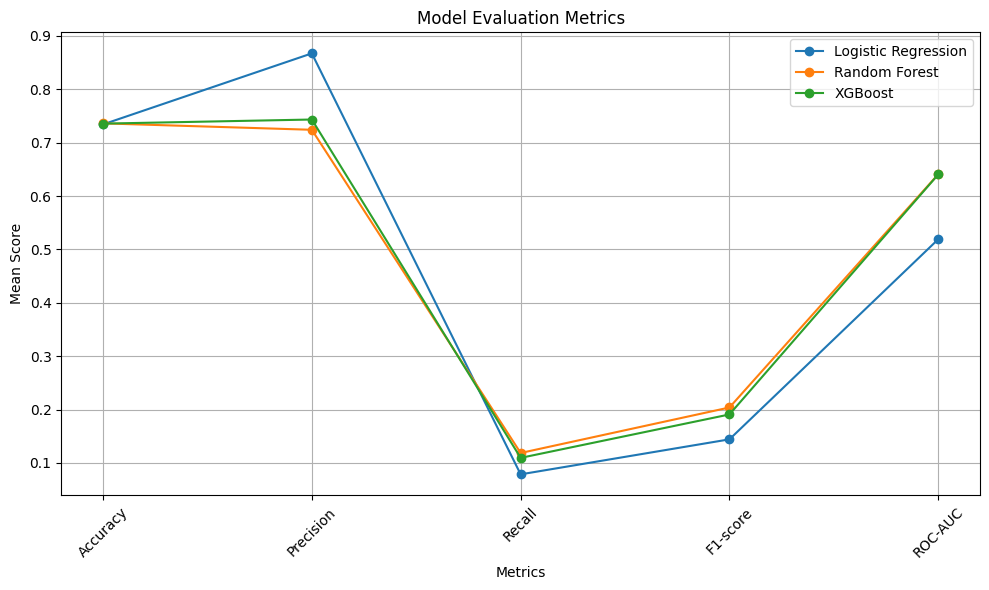

In [13]:
import matplotlib.pyplot as plt

# Define the evaluation metrics and their corresponding scores
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
lr_scores_mean = [lr_scores['test_accuracy'].mean(), lr_scores['test_precision'].mean(), lr_scores['test_recall'].mean(), lr_scores['test_f1'].mean(), lr_scores['test_roc_auc'].mean()]
rf_scores_mean = [rf_scores['test_accuracy'].mean(), rf_scores['test_precision'].mean(), rf_scores['test_recall'].mean(), rf_scores['test_f1'].mean(), rf_scores['test_roc_auc'].mean()]
xgb_scores_mean = [xgb_scores['test_accuracy'].mean(), xgb_scores['test_precision'].mean(), xgb_scores['test_recall'].mean(), xgb_scores['test_f1'].mean(), xgb_scores['test_roc_auc'].mean()]

# Plot the evaluation metrics for each model
plt.figure(figsize=(10, 6))
plt.plot(evaluation_metrics, lr_scores_mean, marker='o', label='Logistic Regression')
plt.plot(evaluation_metrics, rf_scores_mean, marker='o', label='Random Forest')
plt.plot(evaluation_metrics, xgb_scores_mean, marker='o', label='XGBoost')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.4 MB/s eta 0:00:00


In [15]:
!pip install whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 2.1 MB/s eta 0:00:00


In [16]:
import pandas as pd
import tldextract
from datetime import datetime
import whois

def extract_domain_features(urls):
    features = []
    for url in urls:
        domain = tldextract.extract(url).domain
        domain_length = len(domain)
        num_subdomains = len(tldextract.extract(url).subdomain.split('.'))
        try:
            domain_info = whois.whois(domain)
            creation_date = domain_info.creation_date
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            age_days = (datetime.now() - creation_date).days
        except:
            age_days = None
        features.append({
            'domain_length': domain_length,
            'num_subdomains': num_subdomains,
            'domain_age_days': age_days
        })
    return pd.DataFrame(features)

# Example dataset
urls = ['https://www.google.com', 'http://phishing-site.com', 'https://legitimate-site.com']

# Extract features for each URL
df = extract_domain_features(urls)

# Add labels manually
df['label'] = ['legitimate', 'phishing', 'legitimate']

# Print the DataFrame
print(df)


   domain_length  num_subdomains domain_age_days       label
0              6               1            None  legitimate
1             13               1            None    phishing
2             15               1            None  legitimate


In [17]:
import joblib

# Assuming best_rf_model is your trained Random Forest model
best_rf_model = rf_model

# Save the Random Forest model as a pickle file
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

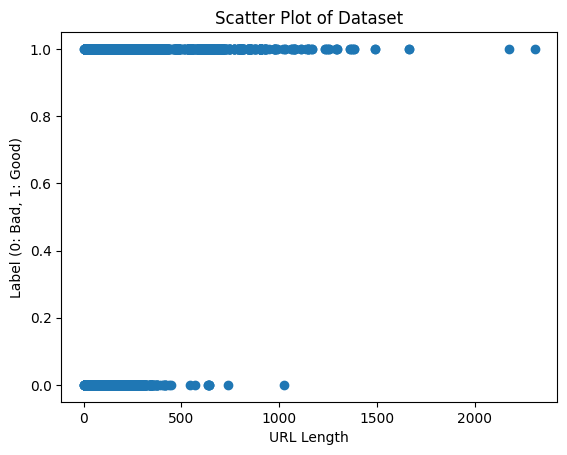

In [19]:
# prompt: scatter plot of dataset

import matplotlib.pyplot as plt

# Assume X and y are your data points
plt.scatter(X, y)
plt.xlabel("URL Length")
plt.ylabel("Label (0: Bad, 1: Good)")
plt.title("Scatter Plot of Dataset")
plt.show()


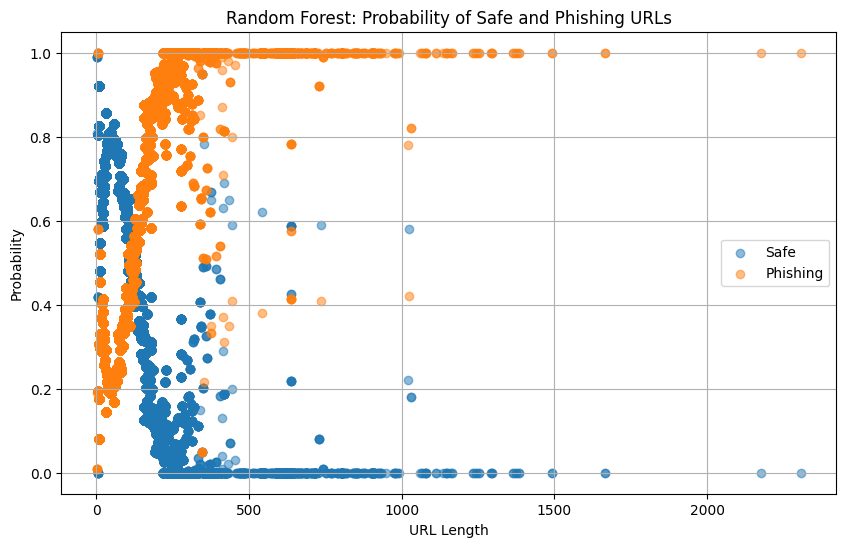

In [21]:
# prompt: probabilty of safe and phising in dataset visualize of random forest

import pandas as pd
import matplotlib.pyplot as plt
# Predict the probabilities of each data point being safe or phishing
y_pred_prob = best_rf_model.predict_proba(X)

# Extract the probabilities for the safe and phishing classes
safe_probabilities = y_pred_prob[:, 0]
phishing_probabilities = y_pred_prob[:, 1]

# Create a DataFrame to store the probabilities
prob_df = pd.DataFrame({
    'URL Length': X.values.ravel(),
    'Safe Probability': safe_probabilities,
    'Phishing Probability': phishing_probabilities
})

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.scatter(prob_df['URL Length'], prob_df['Safe Probability'], alpha=0.5, label='Safe')
plt.scatter(prob_df['URL Length'], prob_df['Phishing Probability'], alpha=0.5, label='Phishing')
plt.xlabel('URL Length')
plt.ylabel('Probability')
plt.title('Random Forest: Probability of Safe and Phishing URLs')
plt.legend()
plt.grid(True)
plt.show()
